# Nonlinear Optimization Examples

## Example 1: Unconstrained Nonlinear Optimization

In this example, we will minimize the Rosenbrock function, a common test problem for optimization algorithms.

The Rosenbrock function is defined as:

$ f(x, y) = (a - x)^2 + b(y - x^2)^2 $

We will minimize this function using the BFGS method.

In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# Initial guess
x0 = np.array([0, 0])

# Perform the optimization
result = minimize(rosenbrock, x0, method='BFGS')
print('Optimal parameters:', result.x)
print('Function value at optimum:', result.fun)

Optimal parameters: [0.99999467 0.99998932]
Function value at optimum: 2.8440316101421118e-11


## What `scipy.optimize.minimize` Does

The `scipy.optimize.minimize` function is a versatile and powerful tool for performing optimization in Python. It is used to minimize a scalar function of one or more variables. Below are some features and limitations of this function:

### Capabilities
- **Support for Different Methods:**
  - `BFGS`, `CG`, `L-BFGS-B`, `Newton-CG`, `TNC`, `SLSQP`, and more.
- **Support for Constraints:**
  - Equality and inequality constraints.
- **Support for Bounds:**
  - Variable bounds for unconstrained optimization.
- **Gradient and Hessian:**
  - Option to provide custom gradient (Jacobian) and Hessian.
- **Initial Guess:**
  - Allows specifying an initial guess for the variables.

### Limitations
- **Global vs. Local Minima:**
  - It finds a local minimum, which may not be the global minimum.
- **Convergence:**
  - May require good initial guesses for convergence.
- **Non-Differentiable Functions:**
  - Performance may degrade with non-differentiable or highly nonlinear functions.

### Documentation
For more details, refer to the [official SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

## Introduction to BFGS

The Broyden–Fletcher–Goldfarb–Shanno (BFGS) method is one of the most widely used algorithms for unconstrained optimization. It belongs to the family of quasi-Newton methods. Here are some key points:

### How BFGS Works
- **Objective:**
  - To find the minimum of a differentiable scalar function.
- **Approach:**
  - It approximates the Hessian matrix of the second derivatives of the function.
  - The approximation is updated iteratively using gradient information.
- **Efficiency:**
  - Suitable for medium to large-scale problems due to its good balance between robustness and performance.

### Advantages
- **Convergence:**
  - Superlinear convergence rate.
- **Robustness:**
  - Performs well with noisy gradients.
- **No Exact Hessian Required:**
  - Does not require computation of second derivatives.

### Disadvantages
- **Memory Requirements:**
  - Can be memory-intensive for large-scale problems.

### References
- For more theoretical and practical insights, see:
  - Nocedal, J., & Wright, S. J. (2006). Numerical Optimization. Springer.
  - [Wikipedia Page on BFGS](https://en.wikipedia.org/wiki/BFGS_method)
- For a practical guide, refer to the [SciPy documentation on BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html).

## Example 2: Constrained Nonlinear Optimization

In this example, we will minimize a nonlinear function subject to some constraints.

We want to minimize $f(x, y) = x^2 + y^2$ subject to the constraint $x + y = 1$.

The optimization problem is:


\begin{align*}
\text{Minimize} \quad & f(x, y) = x^2 + y^2 \\
\text{Subject to} \quad & x + y = 1
\end{align*}

We will solve this using the SLSQP (Sequential Least Squares Programming) method.

In [2]:
from scipy.optimize import minimize

# Define the objective function
def objective(x):
    return x[0]**2 + x[1]**2

# Define the constraint
def constraint(x):
    return x[0] + x[1] - 1

# Initial guess
x0 = np.array([0.5, 0.5])

# Set up the constraints dictionary
con = {'type': 'eq', 'fun': constraint}

# Perform the optimization
result = minimize(objective, x0, method='SLSQP', constraints=[con])
print('Optimal parameters:', result.x)
print('Function value at optimum:', result.fun)

Optimal parameters: [0.5 0.5]
Function value at optimum: 0.5


## Understanding Constraints in `scipy.optimize.minimize` and SLSQP

### Understanding Constraints in `scipy.optimize.minimize`

Constraints in optimization are conditions that the solution must satisfy. `scipy.optimize.minimize` supports two types of constraints:

- **Equality constraints:** $c(x) = 0 $
- **Inequality constraints:** $c(x) \geq 0 $

Constraints can be defined using dictionaries specifying the type and the function representing the constraint.

#### Documentation

For more details, refer to the [official SciPy documentation on constraints](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

### Introduction to SLSQP

The Sequential Least Squares Programming (SLSQP) method is a gradient-based optimization algorithm used for nonlinear constrained optimization problems. Here's a brief overview:

#### How SLSQP Works

**Objective:**
It aims to minimize or maximize a function subject to equality and inequality constraints.

**Approach:**
Approximates the problem using quadratic programming.
Solves sequences of approximations to find the optimal solution.

#### Advantages

- **Versatile:**
  Can handle a wide range of constraints.
- **Efficient:**
  Often faster for small to medium-sized problems with constraints.

#### Disadvantages

- **Sensitivity to Initial Guess:**
  May require a good initial guess for convergence.
- **Local Minima:**
  Like other gradient-based methods, it may converge to local minima.

#### References

For more details, see:
- [Official SciPy documentation on SLSQP](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html).

## Example 3: Nonlinear Optimization with Bounds

In this example, we will minimize $f(x, y) = (x-1)^2 + (y-1.5)^2$ with bounds on the variables $x$ and $y$.

The optimization problem is:

\begin{align*}
\text{Minimize} \quad & f(x, y) = (x - 1)^2 + (y - 1.5)^2 \\
\text{Subject to} \quad & 0 \le x \le 2 \\
& 0 \le y \le 3
\end{align*}

We will solve this using the L-BFGS-B (Limited-memory Broyden–Fletcher–Goldfarb–Shanno with Box constraints) method.

In [3]:
from scipy.optimize import minimize

# Define the objective function
def objective(x):
    return (x[0] - 1)**2 + (x[1] - 1.5)**2

# Initial guess
x0 = np.array([0, 0])

# Set up the bounds
bounds = [(0, 2), (0, 3)]

# Perform the optimization
result = minimize(objective, x0, method='L-BFGS-B', bounds=bounds)
print('Optimal parameters:', result.x)
print('Function value at optimum:', result.fun)

Optimal parameters: [1.  1.5]
Function value at optimum: 4.9947937063333915e-17


# Understanding Bounds in `scipy.optimize.minimize` and L-BFGS-B

## Understanding Bounds in `scipy.optimize.minimize`

Bounds are constraints that limit the range of the variables. In `scipy.optimize.minimize`, bounds are specified as a sequence of tuples, where each tuple defines the lower and upper bound for a variable.

### Documentation

For more details, refer to the [official SciPy documentation on bounds](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

## Introduction to L-BFGS-B

The Limited-memory Broyden–Fletcher–Goldfarb–Shanno with Box constraints (L-BFGS-B) method is an extension of the BFGS method that can handle bound constraints on the variables efficiently.

### How L-BFGS-B Works

- **Objective:**
  To find the minimum of a differentiable scalar function with bound constraints.
- **Approach:**
  Uses a limited-memory version of BFGS.
  Incorporates bound constraints during the iterative process.

### Advantages

- **Memory Efficient:**
  Suitable for large-scale optimization problems.
- **Handles Bound Constraints:**
  Efficiently handles variables with upper and lower bounds.

### Disadvantages

- **Gradient Information Required:**
  Like BFGS, it requires gradient information.

### References

- **For more theoretical understanding, see:**
  - Byrd, R. H., Lu, P., Nocedal, J., & Zhu, C. (1995). A Limited Memory Algorithm for Bound Constrained Optimization. SIAM Journal on Scientific Computing.
  - [Wikipedia Page on L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS).
- **For practical use, refer to:**
  - [Official SciPy documentation on L-BFGS-B](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html).

## Example 1: Solving a Linear Program

In this example, we will solve a simple linear program. The goal is to minimize a linear objective function subject to linear inequality constraints.

The optimization problem is:

\begin{align*}
\text{Minimize} \quad & 3x + 2y \\
\text{Subject to} \quad & x + y \leq 4 \\
& 2x - y \leq 2 \\
& x, y \geq 0
\end{align*}

In [4]:
import cvxpy as cp

# Define the decision variables
x = cp.Variable()
y = cp.Variable()

# Define the objective function
objective = cp.Minimize(3 * x + 2 * y)

# Define the constraints
constraints = [
    x + y <= 4,
    2 * x - y <= 2,
    x >= 0,
    y >= 0
]

# Formulate the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
result = problem.solve()

# Print the results
print("Optimal value:", result)
print("Optimal x:", x.value)
print("Optimal y:", y.value)

(CVXPY) Sep 16 12:50:59 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Sep 16 12:50:59 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
Optimal value: 2.0291355587427553e-09
Optimal x: 1.1398298385319745e-10
Optimal y: 8.435933035915815e-10


## Example 2: Solving a Quadratic Program

In this example, we will solve a quadratic program. The goal is to minimize a quadratic objective function subject to linear constraints.

The optimization problem is:

\begin{align*}
\text{Minimize} \quad & \frac{1}{2}x^2 + y^2 \\
\text{Subject to} \quad & x + y \geq 1 \\
& x \leq 1 \\
& y \leq 1
\end{align*}

In [5]:
import cvxpy as cp

# Define the decision variables
x = cp.Variable()
y = cp.Variable()

# Define the objective function
objective = cp.Minimize(0.5 * cp.square(x) + cp.square(y))

# Define the constraints
constraints = [
    x + y >= 1,
    x <= 1,
    y <= 1
]

# Formulate the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
result = problem.solve()

# Print the results
print("Optimal value:", result)
print("Optimal x:", x.value)
print("Optimal y:", y.value)

Optimal value: 0.3333333333333333
Optimal x: 0.6666666666666666
Optimal y: 0.3333333333333333


## Example 3: Solving a Semidefinite Program

In this example, we will solve a semidefinite program. The goal is to minimize a linear objective function subject to a matrix being positive semidefinite.

The optimization problem is:

\begin{align*}
\text{Minimize} \quad & \text{tr}(X) + \text{tr}(Y) \\
\text{Subject to} \quad & \begin{bmatrix}
X & A^T \\
A & Y
\end{bmatrix} \succeq 0
\end{align*}

where $A$ is a given matrix.

In [6]:
import cvxpy as cp
import numpy as np

# Define the given matrix A
A = np.array([[1, 2], [3, 4]])

# Define the decision variables
X = cp.Variable((2, 2), symmetric=True)
Y = cp.Variable((2, 2), symmetric=True)

# Define the objective function
objective = cp.Minimize(cp.trace(X) + cp.trace(Y))

# Define the semidefinite constraint
constraints = [
    cp.bmat([[X, A.T], [A, Y]]) >> 0
]

# Formulate the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
result = problem.solve()

# Print the results
print("Optimal value:", result)
print("Optimal X:", X.value)
print("Optimal Y:", Y.value)

Optimal value: 11.661872332529779
Optimal X: [[2.05797444 2.40098219]
 [2.40098219 3.77296172]]
Optimal Y: [[1.2004808  1.88648601]
 [1.88648601 4.63045536]]


## Example 4: Solving a Logistic Regression Problem

In this example, we will solve a logistic regression problem. The goal is to find the optimal weights for a logistic regression model.

Given a dataset $(X, y)$ where $X$ is the feature matrix and $y$ is the label vector, the optimization problem is:

\begin{align*}
\text{Minimize} \quad & \sum_{i=1}^n \log(1 + \exp(-y_i (X_i w + b))) \\
\text{Subject to} \quad & ||w||_2 \leq \lambda
\end{align*}

In [7]:
import cvxpy as cp
import numpy as np

# Generate synthetic data
np.random.seed(0)
n, d = 100, 5
X = np.random.randn(n, d)
y = np.sign(np.random.randn(n))
lambda_val = 1.0

# Define the decision variables
w = cp.Variable(d)
b = cp.Variable()

# Define the logistic loss function
logistic_loss = cp.sum(cp.logistic(-cp.multiply(y, X @ w + b)))

# Define the regularization term
regularization = cp.norm(w, 2)

# Define the objective function
objective = cp.Minimize(logistic_loss + lambda_val * regularization)

# Formulate the problem
problem = cp.Problem(objective)

# Solve the problem
result = problem.solve()

# Print the results
print("Optimal value:", result)
print("Optimal w:", w.value)
print("Optimal b:", b.value)

Optimal value: 66.7286149500538
Optimal w: [ 0.22883791  0.10138119  0.34956508  0.00604067 -0.0136736 ]
Optimal b: -0.20286233001583415


# Linear regression with $l_2$-regularizer

In [8]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def basis(x1, x2):
    """compute basis (design) matrix"""
    s = 1.75  # bandwidth (length-scale)
    return np.exp((-(x1 - x2) ** 2) / (2 * s ** 2))

# Linear regression with l2-regularizer
#
# Author: Fangtong Liu
# Date: 06/13/2020
# Author: Aaditya Gala
# Date: 09/13/2023

# create a dataset
z = np.arange(0, 8.1, 0.1)
y = np.exp(-0.1 * z) * np.cos(z)

# pick some training points randomly
N = 15  # number of training points
idx = np.random.choice(np.arange(len(z)), N, replace=False)
x = z[idx]  # training input
t = y[idx] + 0.05 * np.random.randn(N, 1).reshape(-1)  # noisy target

# here we solve for w in a linear model y = w^T * phi
# compute basis (design) matrix
xx, xy = np.meshgrid(x, x)
Phi = basis(xx, xy)
Phi = np.hstack([np.ones((N,1)), Phi])

# solve for w using least squares with l_2 regularizer
w = np.dot(Phi.T, Phi) + 0.1 * np.eye(Phi.shape[1])
w = np.dot(np.linalg.inv(w), np.dot(Phi.T, t))

# predict at arbitrary inputs
xx, xy = np.meshgrid(z, x)
Phi_test = basis(xx, xy)
Phi_test = Phi_test.T
Phi_test = np.hstack([np.ones((z.shape[0], 1)), Phi_test])

y_test = np.dot(Phi_test, w)  # predict all at once

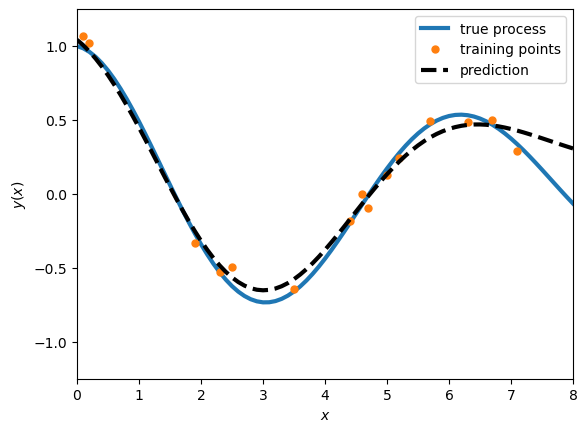

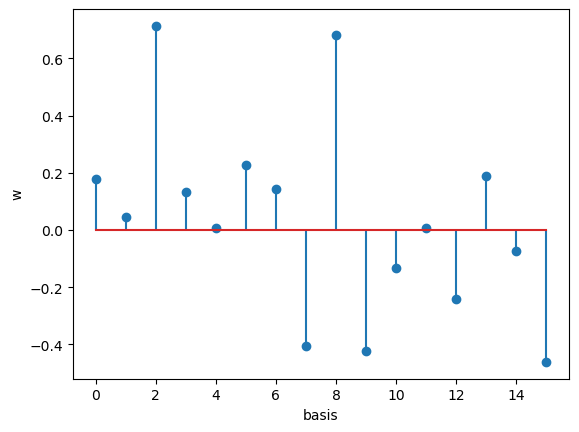

In [9]:
##################### plotting ##################
# plot the true process and training points
fig1 = plt.figure()
plt.plot(z, y, linewidth=3, label='true process')
plt.plot(x, t, '.', markersize=10, label='training points')
plt.plot(z, y_test, '--', color='k', linewidth=3, label='prediction')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.xlim([0, 8])
plt.ylim([-1.25, 1.25])
# fig1.savefig('lin_reg.png')
plt.show()

fig2 = plt.figure()
plt.stem(w)
plt.xlabel('basis')
plt.ylabel('w')
# fig2.savefig('lin_reg_w.png')
plt.show()

# Minimum Norm Convex Optimization

In [10]:
# Minimum Norm Convex Optimization
#
# Author: Aaditya Gala
# Date: 09/13/2023
# Author: Maani Ghaffari
# Date: 09/21/2023

w_cvx = cp.Variable(Phi.shape[1])
objective = cp.Minimize(cp.sum_squares(w_cvx))
# objective = cp.Minimize(cp.pnorm(w_cvx, p=2)**2)
# constraints = [Phi @ w_cvx == t]
tol = 1e-1 # tolerance for imprecision
constraints = [cp.abs(Phi @ w_cvx - t) <= tol]
prob = cp.Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
result = prob.solve(verbose=False)
# The optimal value for w_cvx
# print(w_cvx.value)
# print(result)

In [7]:
# print(f'Shape of Phi = {Phi.shape}')
# print(f'Rank of Phi = {np.linalg.matrix_rank(Phi)}')
# print(f'Rank of Phi.T = {np.linalg.matrix_rank(Phi.T)}')
# print(f'Rank of [[I] [Phi]] = {np.linalg.matrix_rank(np.vstack((np.eye(Phi.shape[0], Phi.shape[1]), Phi)))}')
# print(type(Phi_test))
# print(type(w_cvx.value))
# # print(type(np.array(w_cvx.value, dtype=float)))
# # w_values = np.array(w_cvx.value, dtype=float)
# print(w_cvx.value)

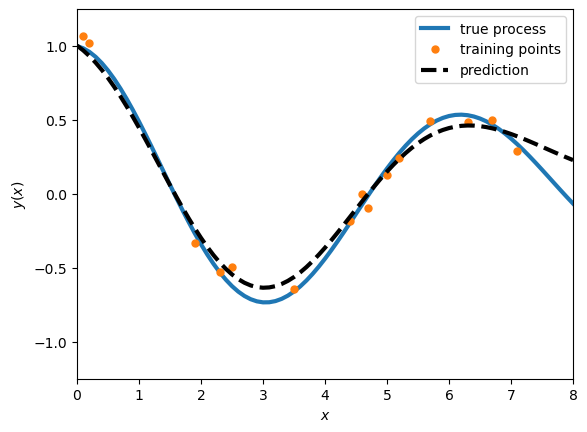

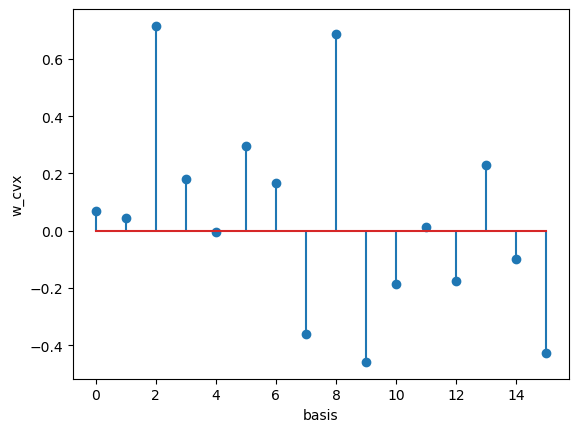

In [11]:
# y_test2 = np.dot(Phi_test, w_cvx.value)
w_values = np.array(w_cvx.value, dtype=float)
# print(w_values.shape)
y_test2 = np.dot(Phi_test, w_values)
# print(y_test2)

# plot the true process and training points
fig3 = plt.figure()
plt.plot(z, y, linewidth=3, label='true process')
plt.plot(x, t, '.', markersize=10, label='training points')
plt.plot(z, y_test2, '--', color='k', linewidth=3, label='prediction')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.xlim([0, 8])
plt.ylim([-1.25, 1.25])
# fig3.savefig('lin_reg_cvx.png')
plt.show()

fig4 = plt.figure()
plt.stem(w_values)
plt.xlabel('basis')
plt.ylabel('w_cvx')
# fig4.savefig('lin_reg_w_cvx.png')
plt.show()